In [1]:
import pandas as pd
import sqlite3
import os
import pandas as pd
from dython import nominal
import plotly.express as px
import os.path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import warnings
warnings.simplefilter('always', category=UserWarning)

In [2]:
# Load csv file into pandas dataframe
df = pd.read_csv(r"C:\Users\Ditshego.Ramokolo\OneDrive - Komatsu Ltd\Documents\School Stuff\ITDAA4-12\heart.csv", sep = ";")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [7]:
# Creating SQLite database
conn = sqlite3.connect('DitshegoRamokolo.db')
cursor = conn.cursor()

In [8]:
# Table Definition
create_table = '''CREATE TABLE IF NOT EXISTS Heart_Rate(
age INTEGER NOT NULL,
sex INTEGER NOT NULL,
cp INTEGER NOT NULL,
trestbps INTEGER NOT NULL,
chol INTEGER NOT NULL,
fbs INTEGER NOT NULL,
restecg INTEGER NOT NULL,
thalach INTEGER NOT NULL,
exang INTEGER NOT NULL,
oldpeak INTEGER NOT NULL,
slope INTEGER NOT NULL,
ca INTEGER NOT NULL,
thal INTEGER NOT NULL,
target INTEGER NOT NULL);
'''
# Creating the table into our database
cursor.execute(create_table)

In [10]:
# Printing pandas dataframe
pd.read_sql('''SELECT * FROM Heart_Rate''', conn)

age     sex               cp  trestbps  chol    fbs   restecg  thalach  \
0     63    Male     asymptomatic       145   233   True    normal      150   
1     37    Male  non-aginal pain       130   250  False  abnormal      187   
2     41  Female  atypical angina       130   204  False    normal      172   
3     56    Male  atypical angina       120   236  False  abnormal      178   
4     57  Female   typical angina       120   354  False  abnormal      163   
..   ...     ...              ...       ...   ...    ...       ...      ...   
298   57  Female   typical angina       140   241  False  abnormal      123   
299   45    Male     asymptomatic       110   264  False  abnormal      132   
300   68    Male   typical angina       144   193   True  abnormal      141   
301   57    Male   typical angina       130   131  False  abnormal      115   
302   57  Female  atypical angina       130   236  False    normal      174   

    exang  oldpeak        slope  ca               thal  target  
0      No      2.3    upsloping   0             normal       1  
1      No      3.5    upsloping   0       fixed defect       1  
2      No      1.4  downsloping   0       fixed defect       1  
3      No      0.8  downsloping   0       fixed defect       1  
4     Yes      0.6  downsloping   0       fixed defect       1  
..    ...      ...          ...  ..                ...     ...  
298   Yes      0.2         flat   0  reversible defect       0  
299    No      1.2         flat   0  reversible defect       0  
300    No      3.4         flat   2  reversible defect       0  
301   Yes      1.2         flat   1  reversible defect       0  
302    No      0.0         flat   1       fixed defect       0  

[303 rows x 14 columns]

In [12]:
conn.execute("UPDATE Heart_Rate set sex = 'Male' where sex = 1")
conn.execute("UPDATE Heart_Rate set sex = 'Female' where sex = 0")
conn.execute("UPDATE Heart_Rate set fbs = 'False' where fbs = 0")
conn.execute("UPDATE Heart_Rate set fbs = 'True' where fbs = 1")
conn.execute("UPDATE Heart_Rate set exang = 'Yes' where exang = 1")
conn.execute("UPDATE Heart_Rate set exang = 'No' where exang = 0")
conn.execute("UPDATE Heart_Rate set cp = 'typical angina' where cp = 0")
conn.execute("UPDATE Heart_Rate set cp = 'atypical angina' where cp = 1")
conn.execute("UPDATE Heart_Rate set cp = 'non-aginal pain' where cp = 2")
conn.execute("UPDATE Heart_Rate set cp = 'asymptomatic' where cp = 3")
conn.execute("UPDATE Heart_Rate set restecg = 'normal' where restecg = 0")
conn.execute("UPDATE Heart_Rate set restecg = 'abnormal' where restecg = 1")
conn.execute("UPDATE Heart_Rate set restecg = 'ventricular' where restecg = 2")
conn.execute("UPDATE Heart_Rate set slope = 'upsloping' where slope = 0")
conn.execute("UPDATE Heart_Rate set slope = 'flat' where slope = 1")
conn.execute("UPDATE Heart_Rate set slope = 'downsloping' where slope = 2")
conn.execute("UPDATE Heart_Rate set thal = 'normal' where thal = 1")
conn.execute("UPDATE Heart_Rate set thal = 'fixed defect' where thal = 2")
conn.execute("UPDATE Heart_Rate set thal = 'reversible defect' where thal = 3")
conn.execute("UPDATE Heart_Rate set thal = 'unknown' where thal = 0")


# creating cursor object to display all
# the data in the table
cursor = conn.execute("SELECT * from Heart_Rate")

In [13]:
#Printing pandas dataframe
pd.read_sql('''SELECT * FROM Heart_Rate''', conn)

age     sex               cp  trestbps  chol    fbs   restecg  thalach  \
0     63    Male     asymptomatic       145   233   True    normal      150   
1     37    Male  non-aginal pain       130   250  False  abnormal      187   
2     41  Female  atypical angina       130   204  False    normal      172   
3     56    Male  atypical angina       120   236  False  abnormal      178   
4     57  Female   typical angina       120   354  False  abnormal      163   
..   ...     ...              ...       ...   ...    ...       ...      ...   
298   57  Female   typical angina       140   241  False  abnormal      123   
299   45    Male     asymptomatic       110   264  False  abnormal      132   
300   68    Male   typical angina       144   193   True  abnormal      141   
301   57    Male   typical angina       130   131  False  abnormal      115   
302   57  Female  atypical angina       130   236  False    normal      174   

    exang  oldpeak        slope  ca               thal  target  
0      No      2.3    upsloping   0             normal       1  
1      No      3.5    upsloping   0       fixed defect       1  
2      No      1.4  downsloping   0       fixed defect       1  
3      No      0.8  downsloping   0       fixed defect       1  
4     Yes      0.6  downsloping   0       fixed defect       1  
..    ...      ...          ...  ..                ...     ...  
298   Yes      0.2         flat   0  reversible defect       0  
299    No      1.2         flat   0  reversible defect       0  
300    No      3.4         flat   2  reversible defect       0  
301   Yes      1.2         flat   1  reversible defect       0  
302    No      0.0         flat   1       fixed defect       0  

[303 rows x 14 columns]

In [14]:
#Printing pandas dataframe
data = pd.read_sql('''SELECT * FROM Heart_Rate''', conn)

In [15]:
# Find and remove duplicate values present in each column
data.drop_duplicates()

age     sex               cp  trestbps  chol    fbs   restecg  thalach  \
0     63    Male     asymptomatic       145   233   True    normal      150   
1     37    Male  non-aginal pain       130   250  False  abnormal      187   
2     41  Female  atypical angina       130   204  False    normal      172   
3     56    Male  atypical angina       120   236  False  abnormal      178   
4     57  Female   typical angina       120   354  False  abnormal      163   
..   ...     ...              ...       ...   ...    ...       ...      ...   
298   57  Female   typical angina       140   241  False  abnormal      123   
299   45    Male     asymptomatic       110   264  False  abnormal      132   
300   68    Male   typical angina       144   193   True  abnormal      141   
301   57    Male   typical angina       130   131  False  abnormal      115   
302   57  Female  atypical angina       130   236  False    normal      174   

    exang  oldpeak        slope  ca               thal  target  
0      No      2.3    upsloping   0             normal       1  
1      No      3.5    upsloping   0       fixed defect       1  
2      No      1.4  downsloping   0       fixed defect       1  
3      No      0.8  downsloping   0       fixed defect       1  
4     Yes      0.6  downsloping   0       fixed defect       1  
..    ...      ...          ...  ..                ...     ...  
298   Yes      0.2         flat   0  reversible defect       0  
299    No      1.2         flat   0  reversible defect       0  
300    No      3.4         flat   2  reversible defect       0  
301   Yes      1.2         flat   1  reversible defect       0  
302    No      0.0         flat   1       fixed defect       0  

[302 rows x 14 columns]

In [16]:
fig = px.bar(data, x='sex', y='target', title='number of patients by sex')
fig.show()

<Axes: title={'center': 'number of patients by Chest Pain Type'}, ylabel='count'>

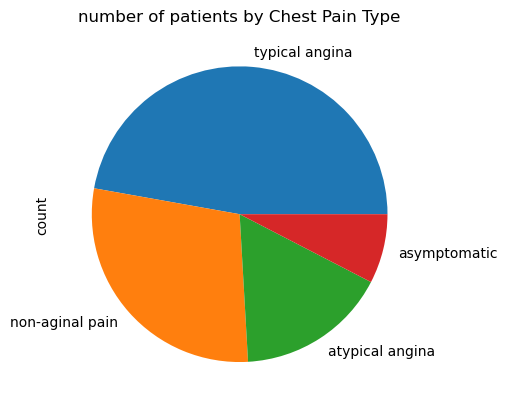

In [17]:
(data['cp']
.str.split(',\s*')
.explode()
.value_counts()
.plot(kind='pie', title='number of patients by Chest Pain Type'))

<Axes: title={'center': 'resting blood pressure (on admission to the hospital)'}, ylabel='proportion'>

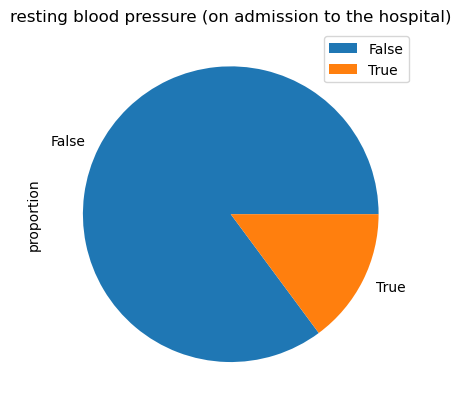

In [18]:
data['fbs'].value_counts('target').plot(kind='pie', title='resting blood pressure (on admission to the hospital)', legend='true')

In [19]:
px.bar(data["restecg"].value_counts('target'))

<Axes: xlabel='exang', ylabel='target'>

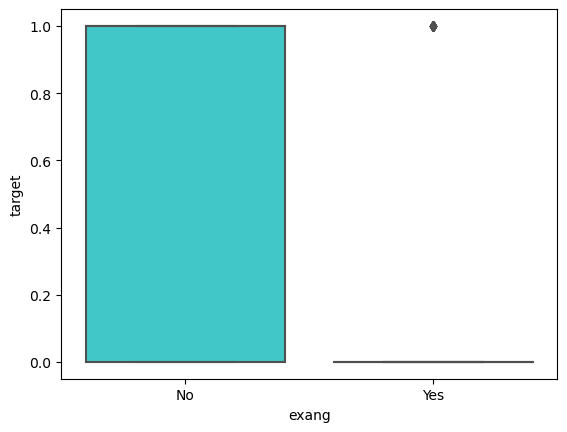

In [20]:
sns.boxplot(x='exang',y='target', data=data,palette='rainbow')

<Axes: xlabel='slope', ylabel='target'>

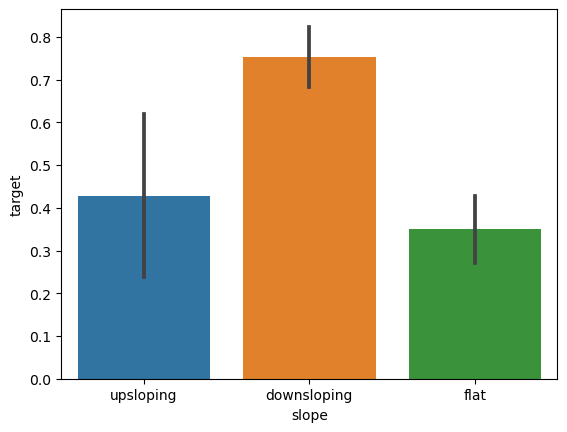

In [21]:
sns.barplot(x='slope',y='target',data=data)

<Axes: xlabel='ca'>

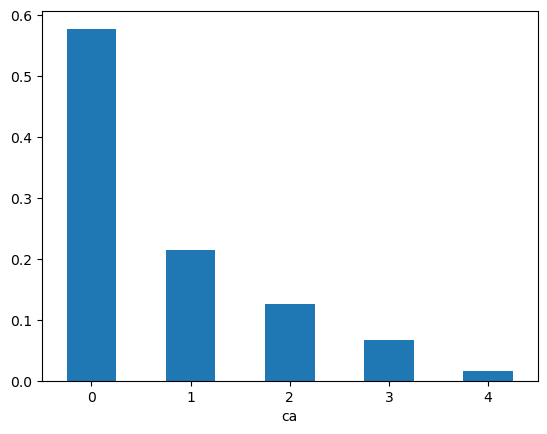

In [22]:
data['ca'].value_counts('target').plot.bar(rot=0)

<Axes: xlabel='thal', ylabel='target'>

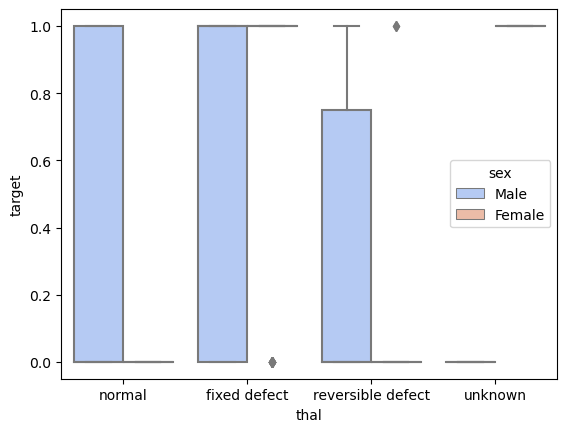

In [23]:
sns.boxplot(x="thal", y="target", hue="sex",data=data, palette="coolwarm")

In [24]:
# Counting the occurrences of each unique category
GroupedData=df.groupby(by='target').size()
print(GroupedData)

target
0    138
1    165
dtype: int64


<Axes: xlabel='target'>

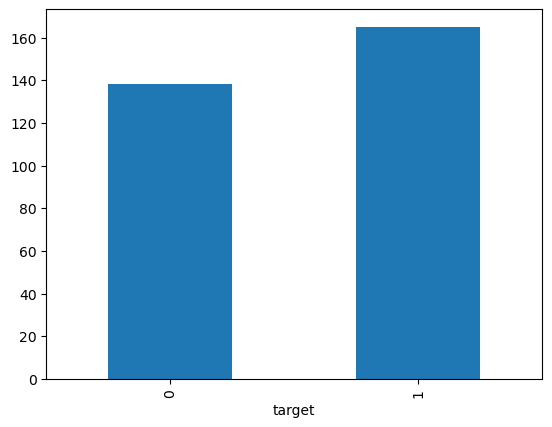

In [25]:
# Generating a bar chart for a single column
%matplotlib inline
GroupedData.plot.bar()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

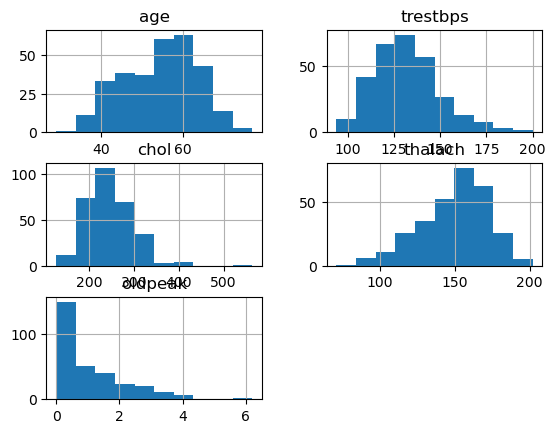

In [26]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df = pd.DataFrame(df)
df[columns].hist()

Submission by: Ditshego


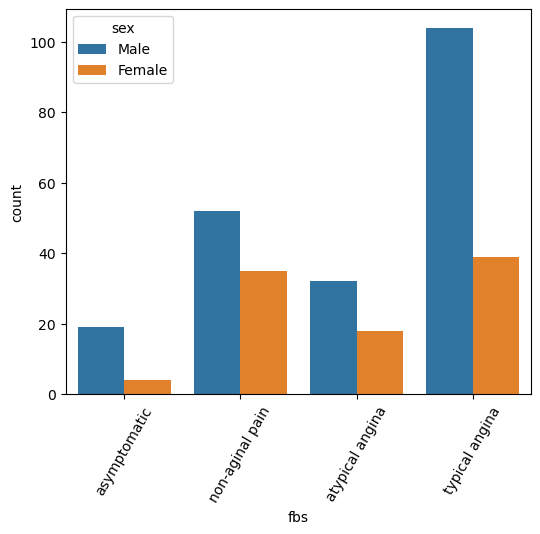

In [27]:
import seaborn as sns

stackup_username = "Ditshego"
print("Submission by:", stackup_username)

# plot the bar plot of fasting blood sugar and patient sex feature
plt.figure(figsize=(6,5))
sns.countplot(x="cp", hue="sex", data=data)
plt.xlabel("fbs")
plt.xticks(rotation=60)
plt.show()

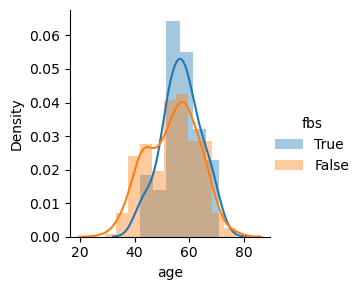

<Figure size 1500x800 with 0 Axes>

In [28]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="fbs").map(sns.distplot,"age").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

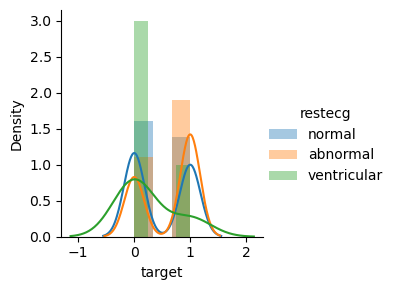

<Figure size 1500x800 with 0 Axes>

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="restecg").map(sns.distplot,"target").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

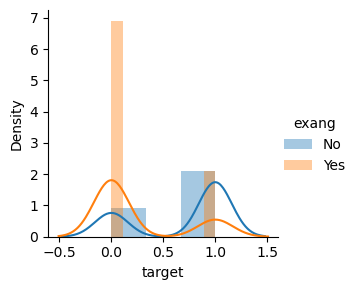

<Figure size 1500x800 with 0 Axes>

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.FacetGrid(data, hue="exang").map(sns.distplot,"target").add_legend()
    plt.figure(figsize=(15, 8))
    plt.show()

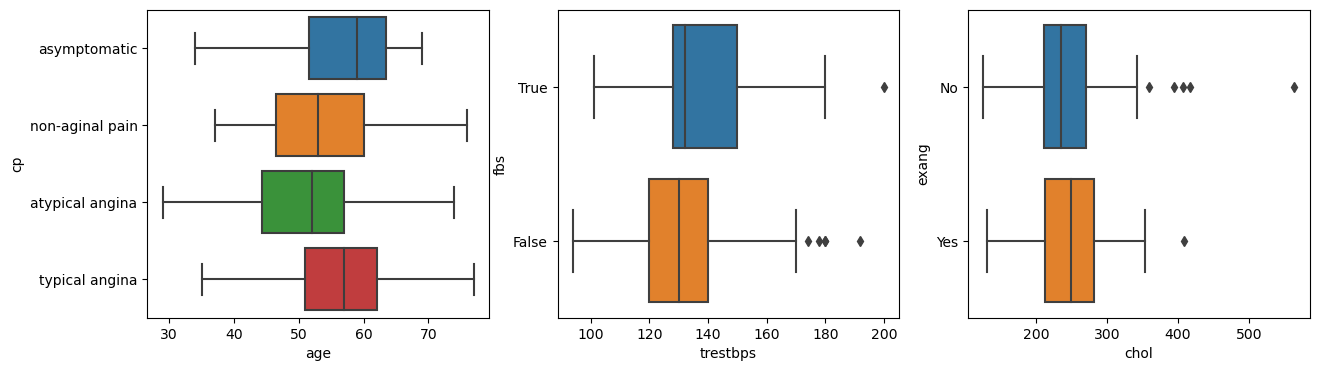

In [31]:
plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'age', y = 'cp', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'trestbps', y = 'fbs', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'chol', y = 'exang', data = data)
plt.show()

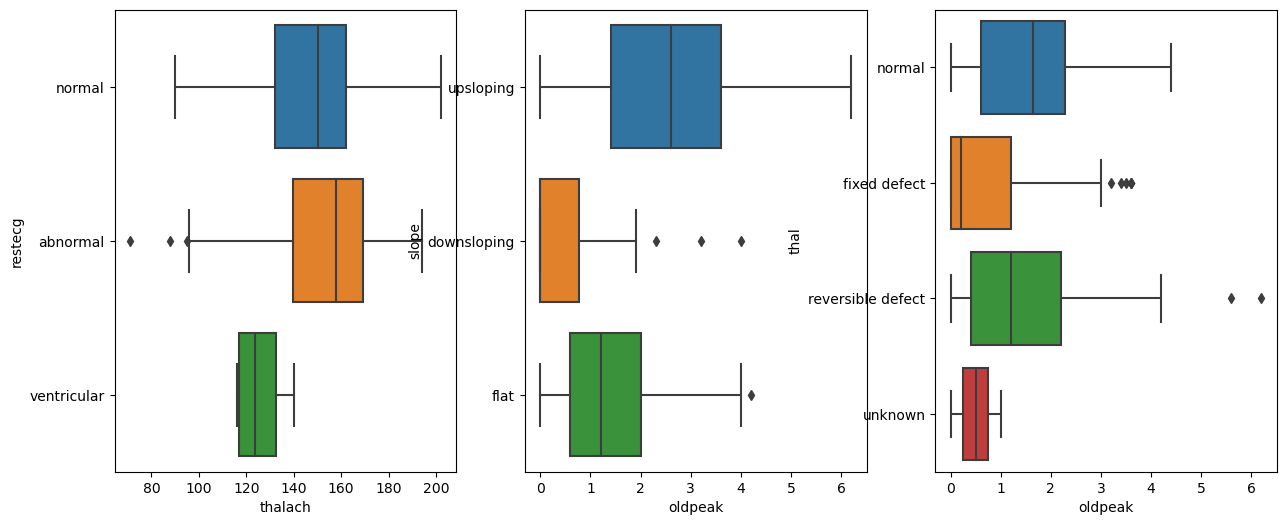

In [32]:
plt.figure(figsize = (15, 6))
plt.subplot(1,3,1)
sns.boxplot(x = 'thalach', y = 'restecg', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'oldpeak', y = 'slope', data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'oldpeak', y = 'thal', data = data)
plt.show()

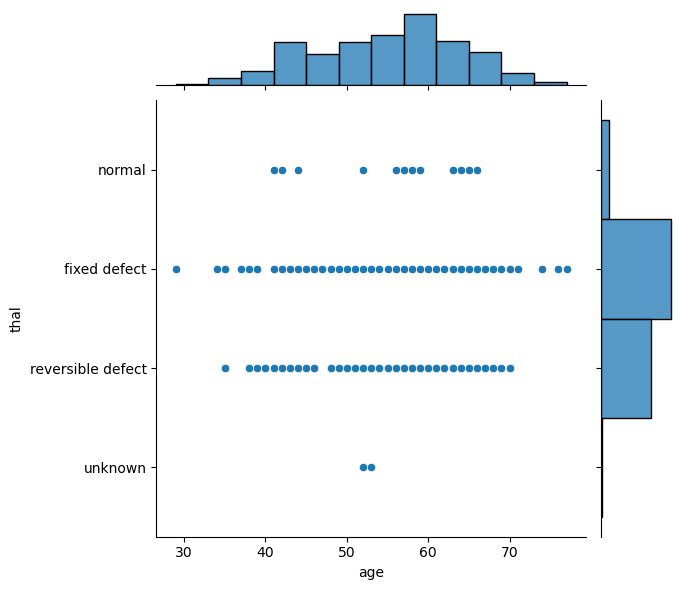

In [33]:
sns.jointplot(x = "age", y = "thal", data=data)
plt.show()

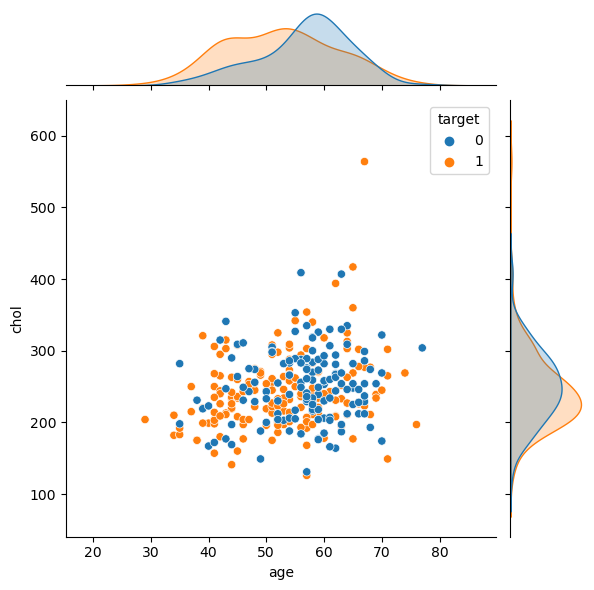

In [34]:
sns.jointplot( x = "age", y = "chol", data = data, hue="target")
plt.show()

C:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



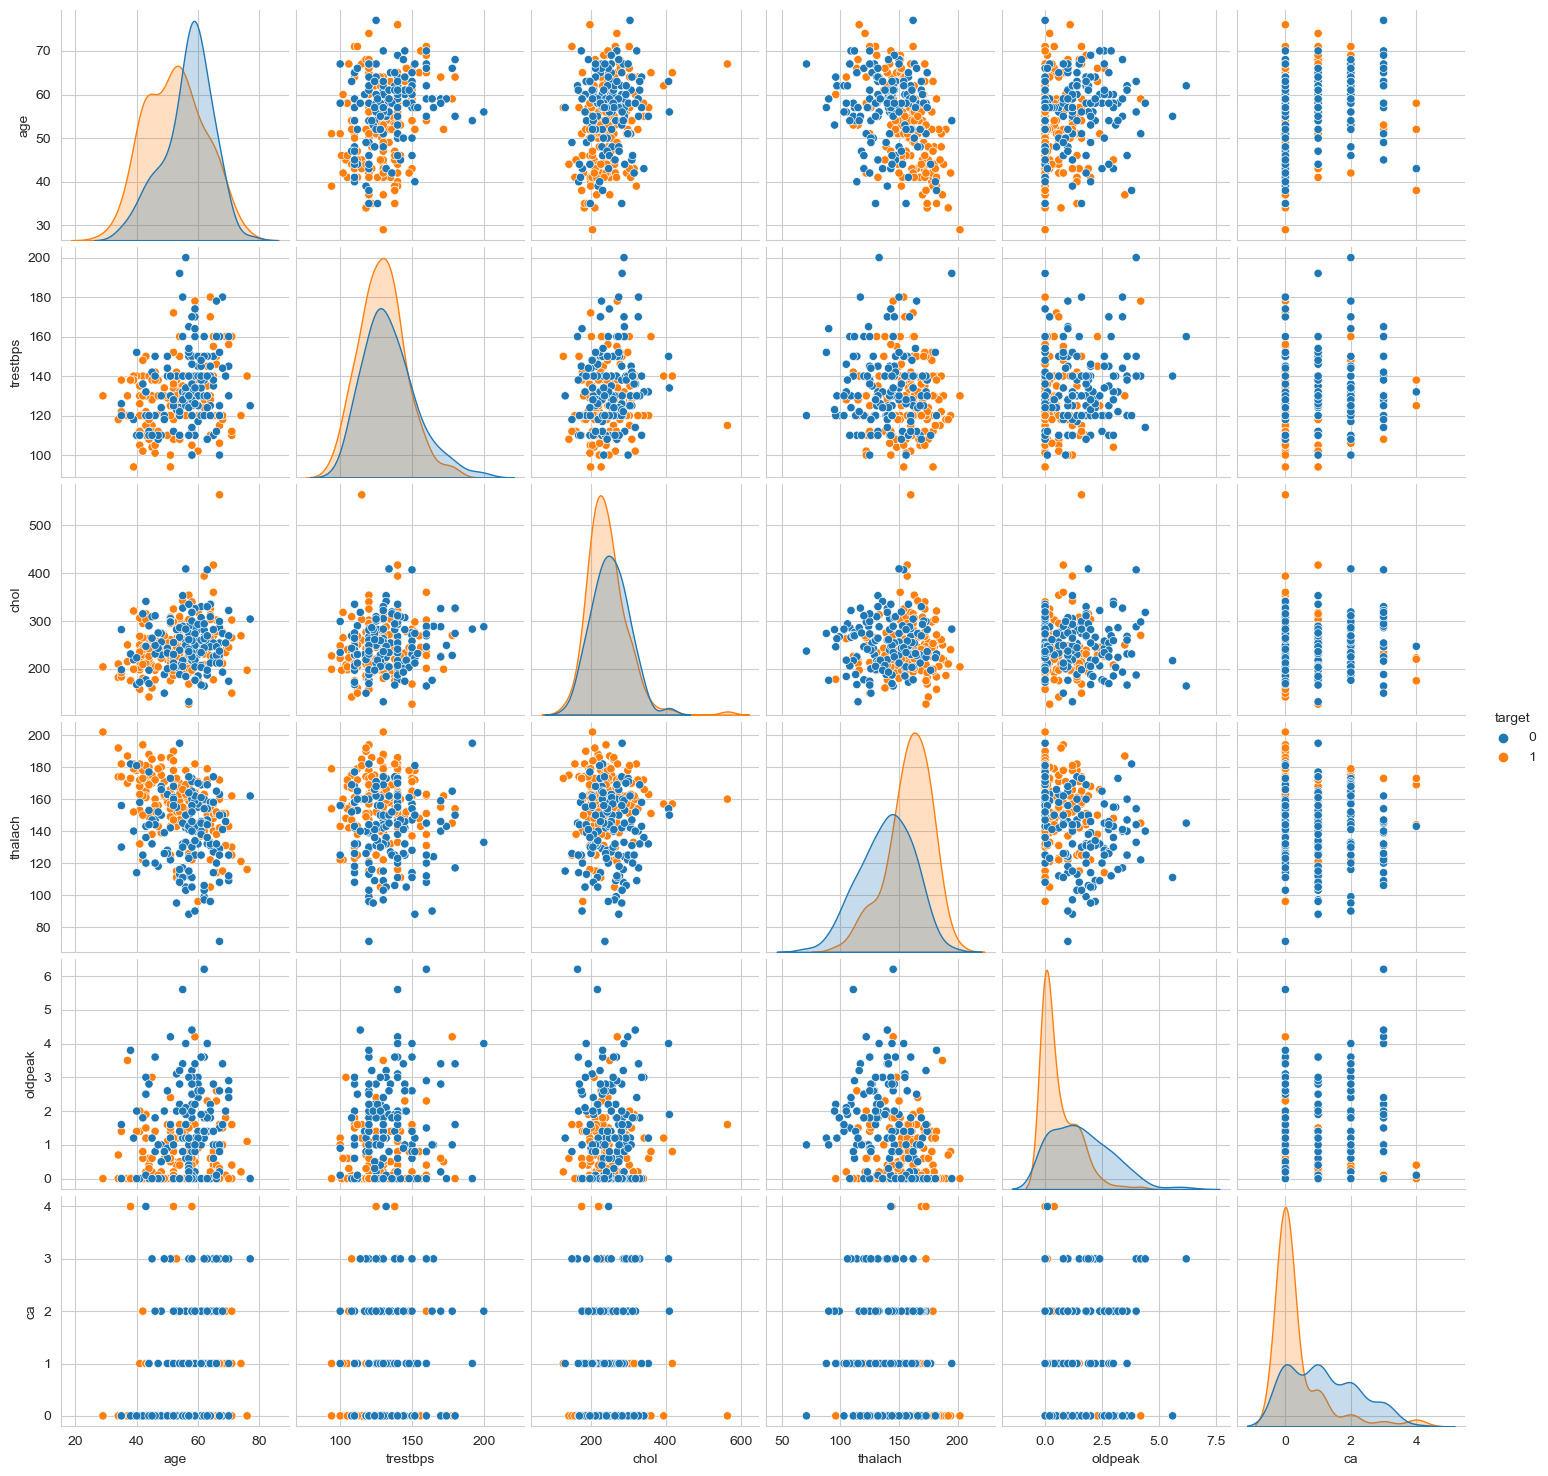

In [35]:
#pair plot for Numerical data against Target
sns.set_style('whitegrid')
sns.pairplot(data, hue='target')

C:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



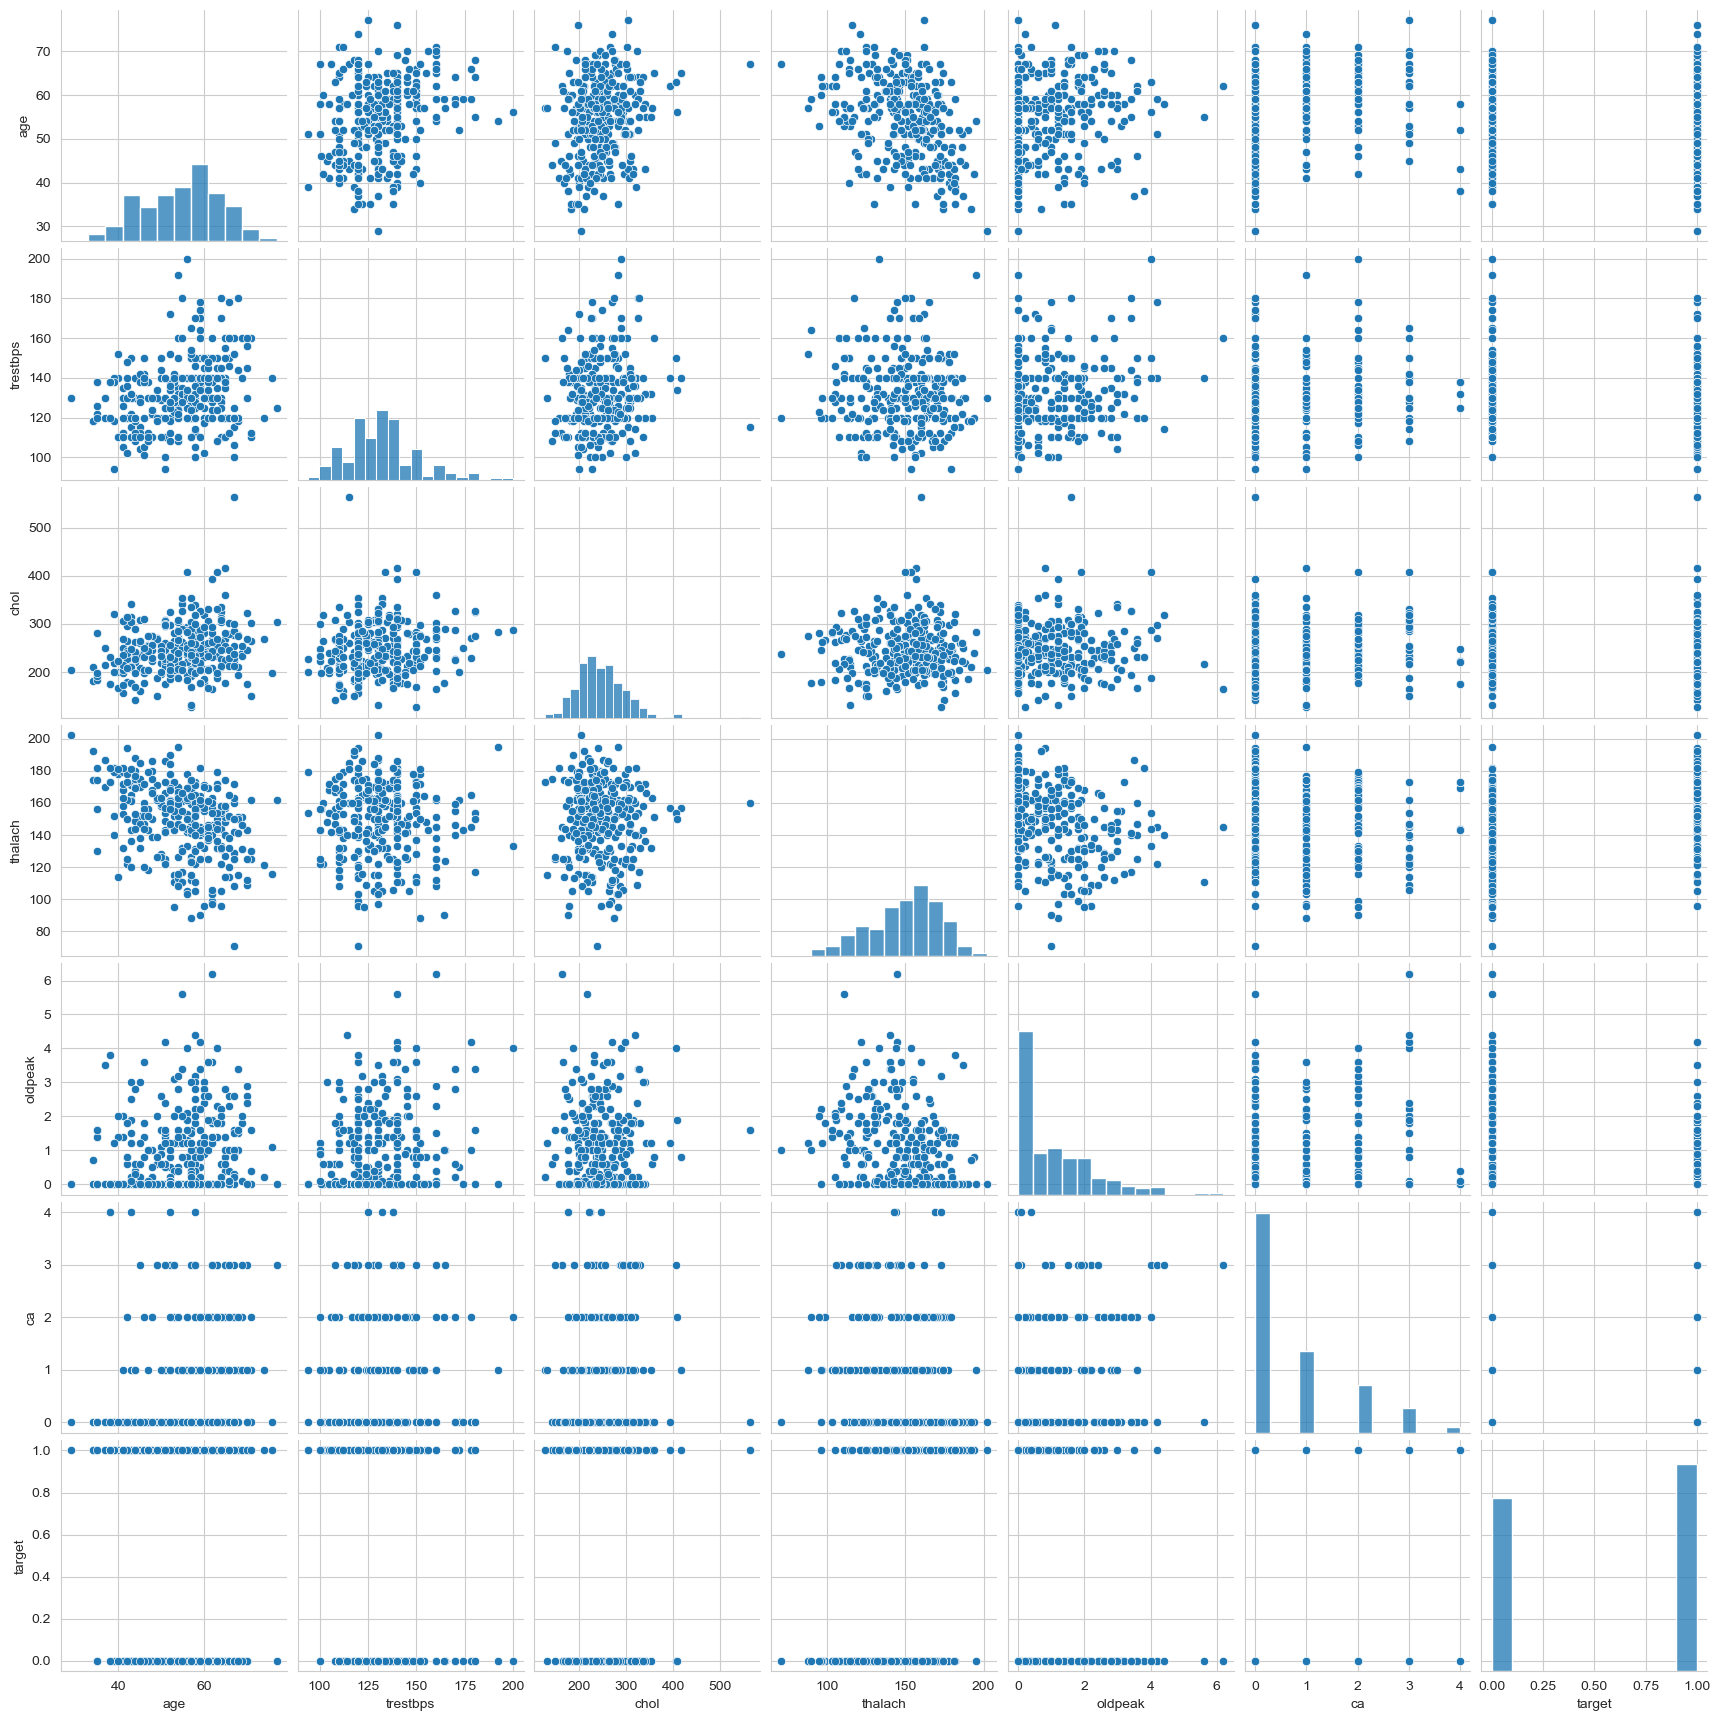

In [36]:
sns.pairplot(data)

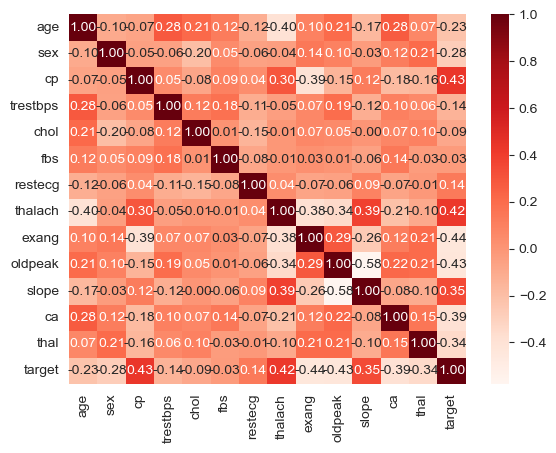

In [38]:
c=df.corr()
sns.heatmap(c,annot=True,fmt=".2f",cmap="Reds")
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

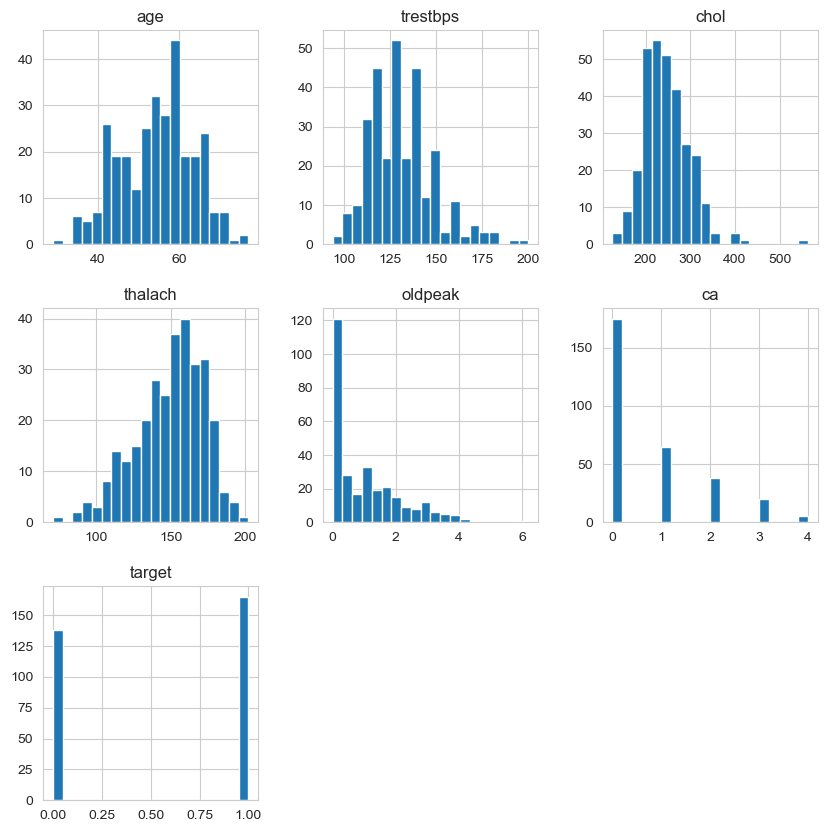

In [39]:
data.hist(bins=20,figsize=(10,10))